In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati
from matplotlib.ticker import FixedLocator, FormatStrFormatter


In [25]:
#confronto for-single thread con par_for_sure_n con n_blocchi variabile
def plot_boxplot(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("seq")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(n_threads[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'thread (worker)',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')
    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='assemble seq'),
        Patch(facecolor='blue', label='assemble parallel')
    ]
    ax.legend(handles=legend_handles, loc='upper right')


    plt.figtext(0.63, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_for)}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [41]:
def plot_speedup(data_list,title,n_threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list] ##Mediana non media 
    speedup = np.zeros(len(n_threads))
    speedup2 = np.zeros(len(n_threads))


    for i in range(len(n_threads)):
        speedup[i] = data_median[1]/data_median[i+1] #data_median[0]/data_median[i+1] speedup rispetto seq
        
    ax.plot(n_threads,speedup,'o--')

    ax.legend(['speedup w.r.t. sequential'])
    ax.set_xscale('log', base=2)  # log2 sull'asse x
    ax.set_xticks(n_threads)
    ax.set_xticklabels([str(n) for n in n_threads], rotation=45)


    ax.set(xlabel = 'workers (thread)',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_list[0])}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print dei valori di speedup con thread ---
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")

## ASSEMBLAGGIO COMPLETO

In [26]:
nodi = 1000 #500 250
n_threads = [1,2,4,8,16,32,64,96]
size_queue = 1024 #hardcome in codice ma qui non conta
kk = -1 # granularity

In [66]:
# === Sequenziale ===
assemble_nodi_250_seq = [45104,45371,45083,45496,45513,45165,45457,45488,45471,45537,45523,45109,44964,45450,45442,45574,45366,45052,45076,45552]
assemble_nodi_500_seq = [196097,193439,196348,192710,196294,191661,195941,192405,194452,193059,195480,190944,196141,193070,194715,193308,196207,191532,195506,193497]
assemble_nodi_1000_seq = [782751,783845,783467,783800,777673,777533,783293,783914,783419,782874,777015,776798,783434,783489,780424,783745,774261,776439,783948,783484]

# === Thread 1 ===
assemble_nodi_250_thread_1 = [33487,33690,33621,33553,33431,33739,33315,34132,33640,34195,33699,34181,33678,34215,33588,33640,33481,33715,33451,33565]
assemble_nodi_500_thread_1 = [147093,144500,147058,144458,150348,142368,148200,143123,148861,143968,148812,143110,147851,143433,147890,143182,147178,143592,147571,142843]
assemble_nodi_1000_thread_1 = [573085,567703,568319,568027,568861,568627,566290,568860,568772,567014,569703,569086,568110,567626,566198,571805,569979,569727,568008,571967]

# === Thread 2 ===
assemble_nodi_250_thread_2 = [21221,21665,21185,21601,21540,21295,21325,21360,21353,21464,21290,21493,21569,21465,21220,21319,20858,21655,21388,21524]
assemble_nodi_500_thread_2 = [94629,91972,97173,91594,96294,91721,96192,91717,97471,91214,96960,91871,94553,93372,94067,91531,96553,92167,94480,91478]
assemble_nodi_1000_thread_2 = [370621,371325,370892,375267,369692,371955,369620,373374,369736,371706,370257,372008,370723,371085,370179,372541,370036,372042,369996,370780]

# === Thread 4 ===
assemble_nodi_250_thread_4 = [16114,15668,15905,16684,16284,16366,15935,16706,15664,15928,15771,15617,16456,15700,18141,15749,16078,16685,15550,15096]
assemble_nodi_500_thread_4 = [65396,65094,65682,64702,67958,71405,65471,64967,69584,69268,65476,64610,70393,64490,65637,66145,65317,65592,65413,74464]
assemble_nodi_1000_thread_4 = [278452,269353,270624,273696,268877,276429,266042,270482,269695,271388,270061,270521,268159,273962,267714,266276,269614,267117,269089,267581]

# === Thread 8 ===
assemble_nodi_250_thread_8 = [11656,12083,12128,12272,12093,12063,12247,12036,12105,12180,12096,12157,12247,12044,12645,12858,11594,11784,11787,11725]
assemble_nodi_500_thread_8 = [52370,53071,52871,53031,52908,52544,52458,52528,52271,53130,53559,52663,53619,53187,52246,52628,52857,52765,52262,54620]
assemble_nodi_1000_thread_8 = [215715,213779,212989,213504,215884,217786,215255,214337,214241,213522,219222,212346,213389,212378,215933,212913,220770,213939,214886,215211]

# === Thread 16 ===
assemble_nodi_250_thread_16 = [11294,10160,10105,11425,11420,11283,11379,11531,11528,11334,11280,9774,11335,11330,11320,11271,11484,11712,11459,11384]
assemble_nodi_500_thread_16 = [47659,45806,51971,51370,48479,45862,46582,51988,52276,51704,46022,52274,46007,52938,51946,51671,51959,46273,51548,46500]
assemble_nodi_1000_thread_16 = [211772,211771,189125,189606,188944,193997,189540,189981,189251,189071,189364,194582,191007,189050,195706,188789,189640,188971,189696,189563]

# === Thread 32 ===
assemble_nodi_250_thread_32 = [10905,10896,15299,15257,16046,16403,11200,15383,11640,15951,15281,15773,16180,10951,9984,9812,16686,18417,14357,9931]
assemble_nodi_500_thread_32 = [45057,45163,44851,46017,46036,46746,44734,44965,45796,45361,45527,46458,45244,45580,45078,45037,46967,44737,45830,44571]
assemble_nodi_1000_thread_32 = [201606,187809,191848,197447,189065,187543,200380,189303,197452,198265,187576,191271,195554,189886,192795,201240,188816,187418,191815,192136]

# === Thread 64 ===
assemble_nodi_250_thread_64 = [15443,17281,11921,17086,15913,18964,18218,11588,16687,17672,17359,16579,16783,17119,16645,16010,15882,17993,17053,16594]
assemble_nodi_500_thread_64 = [49832,45734,52207,46846,49276,45275,49110,49297,54882,48713,44454,48149,45007,47772,46433,49932,44671,47016,47622,45251]
assemble_nodi_1000_thread_64 = [187667,188455,191035,188366,192149,187398,189944,188090,190454,199776,198467,192419,192045,191224,199656,198305,196188,191013,192371,194093]

# === Thread 96 ===
assemble_nodi_250_thread_96 = [13949,12803,19251,18277,17213,13562,17240,16607,14256,19157,18508,17623,16428,13311,25187,13501,13674,23944,24737,24172]
assemble_nodi_500_thread_96 = [57421,53250,52935,50950,52337,53636,62830,53640,54043,59938,57783,52216,50165,53220,56750,53105,57167,50285,54451,50698]
assemble_nodi_1000_thread_96 = [197304,195236,197327,193478,189540,192488,194666,188686,204966,198734,197699,196132,197252,196993,199039,195990,193552,194136,198632,192066]


In [67]:
# Multi liste per nodi 250
assemble_nodi_250_multi = [
    assemble_nodi_250_thread_1,
    assemble_nodi_250_thread_2,
    assemble_nodi_250_thread_4,
    assemble_nodi_250_thread_8,
    assemble_nodi_250_thread_16,
    assemble_nodi_250_thread_32,
    assemble_nodi_250_thread_64,
    assemble_nodi_250_thread_96
]

# Multi liste per nodi 500
assemble_nodi_500_multi = [
    assemble_nodi_500_thread_1,
    assemble_nodi_500_thread_2,
    assemble_nodi_500_thread_4,
    assemble_nodi_500_thread_8,
    assemble_nodi_500_thread_16,
    assemble_nodi_500_thread_32,
    assemble_nodi_500_thread_64,
    assemble_nodi_500_thread_96
]

# Multi liste per nodi 1000
assemble_nodi_1000_multi = [
    assemble_nodi_1000_thread_1,
    assemble_nodi_1000_thread_2,
    assemble_nodi_1000_thread_4,
    assemble_nodi_1000_thread_8,
    assemble_nodi_1000_thread_16,
    assemble_nodi_1000_thread_32,
    assemble_nodi_1000_thread_64,
    assemble_nodi_1000_thread_96
]




=== Median values (µs) ===
seq: 783356.00
1: 568699.50
2: 370836.00
4: 269654.50
8: 214289.00
16: 189584.50
32: 191831.50
64: 191634.50
96: 196061.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.53
4 threads -> speedup: 2.11
8 threads -> speedup: 2.65
16 threads -> speedup: 3.00
32 threads -> speedup: 2.96
64 threads -> speedup: 2.97
96 threads -> speedup: 2.90


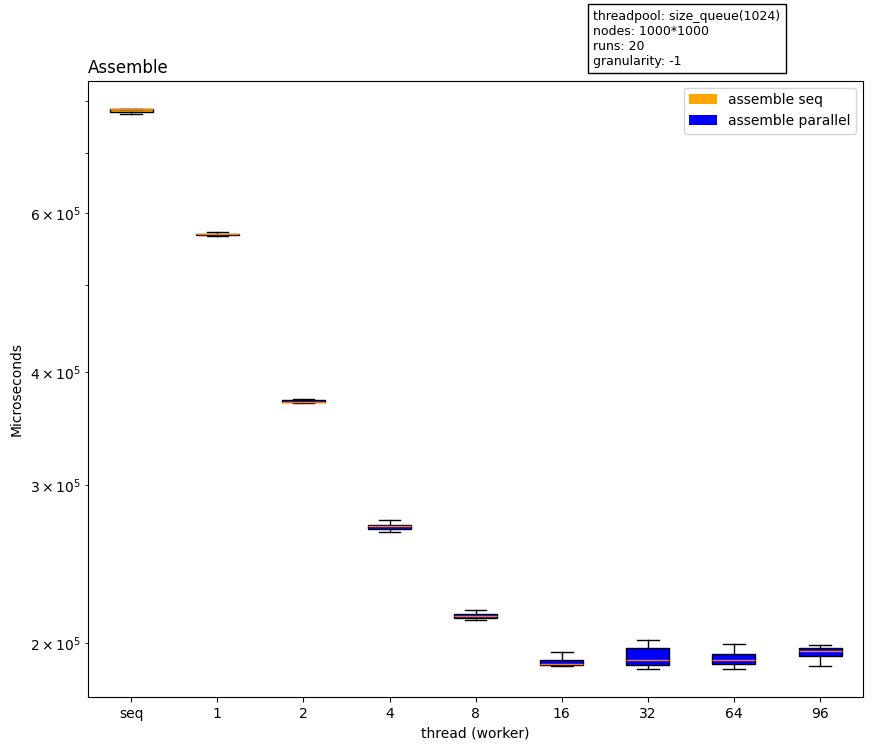

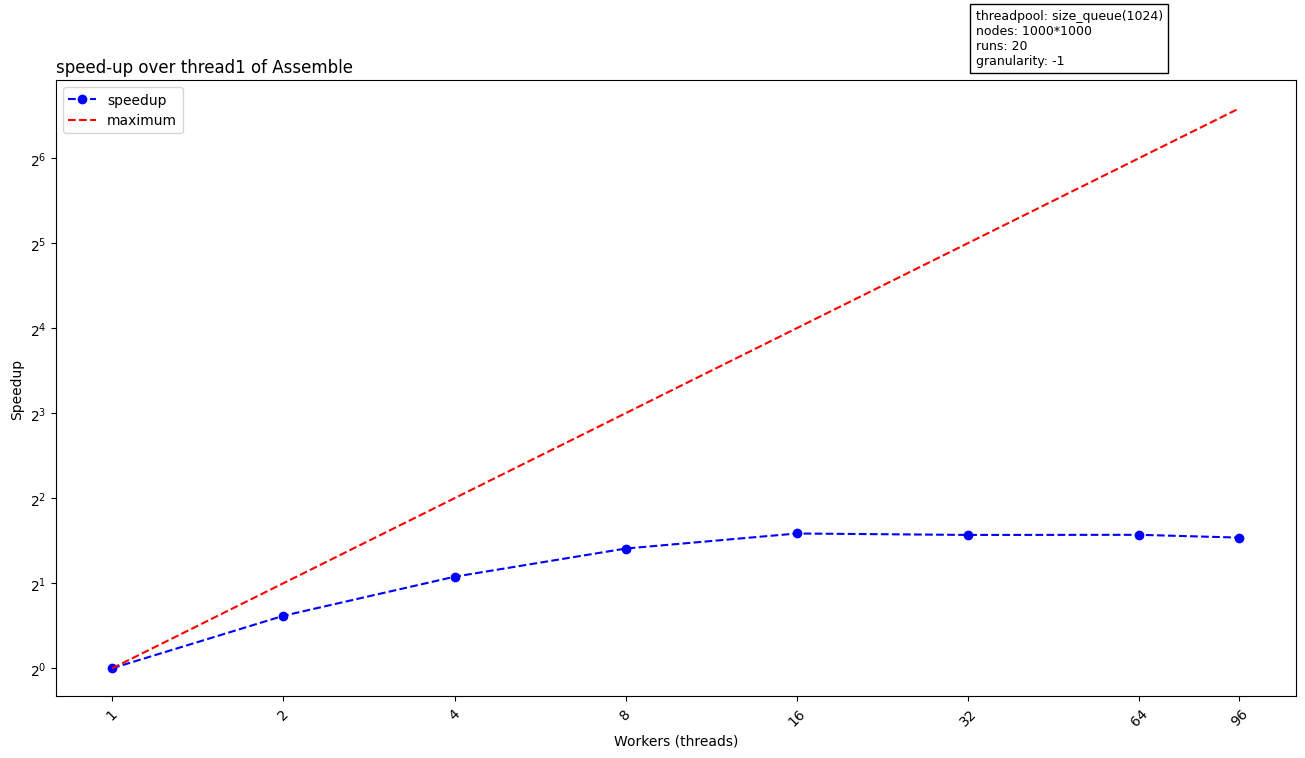

In [68]:
nodi = 1000 #500 250
plot_boxplot(assemble_nodi_1000_seq, assemble_nodi_1000_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_1000_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_1000_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)


=== Median values (µs) ===
for: 193974.50
1: 145779.00
2: 93719.50
4: 65534.00
8: 52811.00
16: 51459.00
32: 45302.50
64: 47697.00
96: 53443.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.56
4 threads -> speedup: 2.22
8 threads -> speedup: 2.76
16 threads -> speedup: 2.83
32 threads -> speedup: 3.22
64 threads -> speedup: 3.06
96 threads -> speedup: 2.73


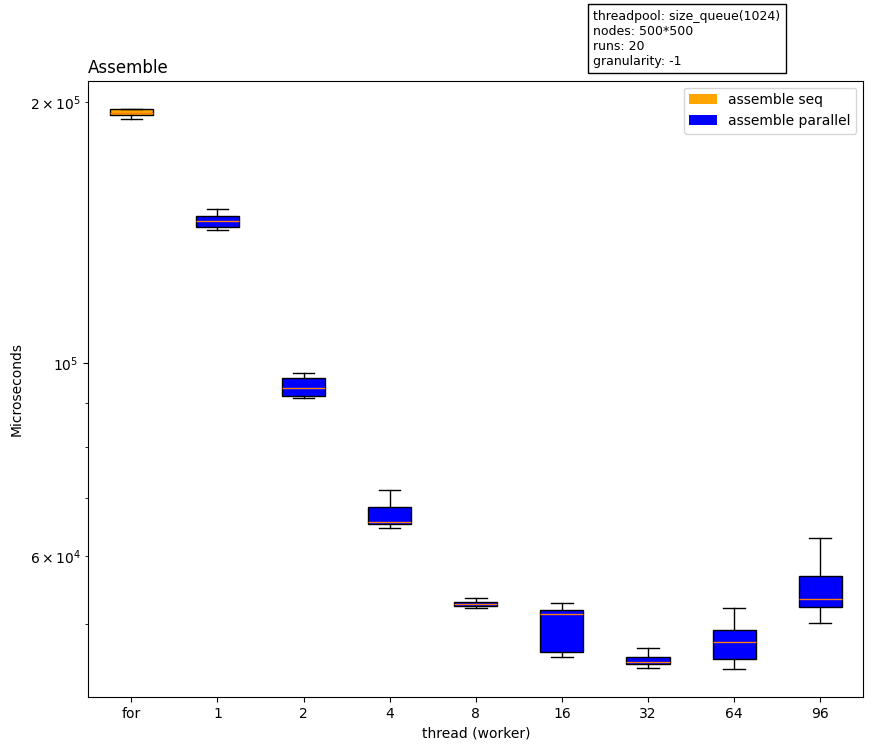

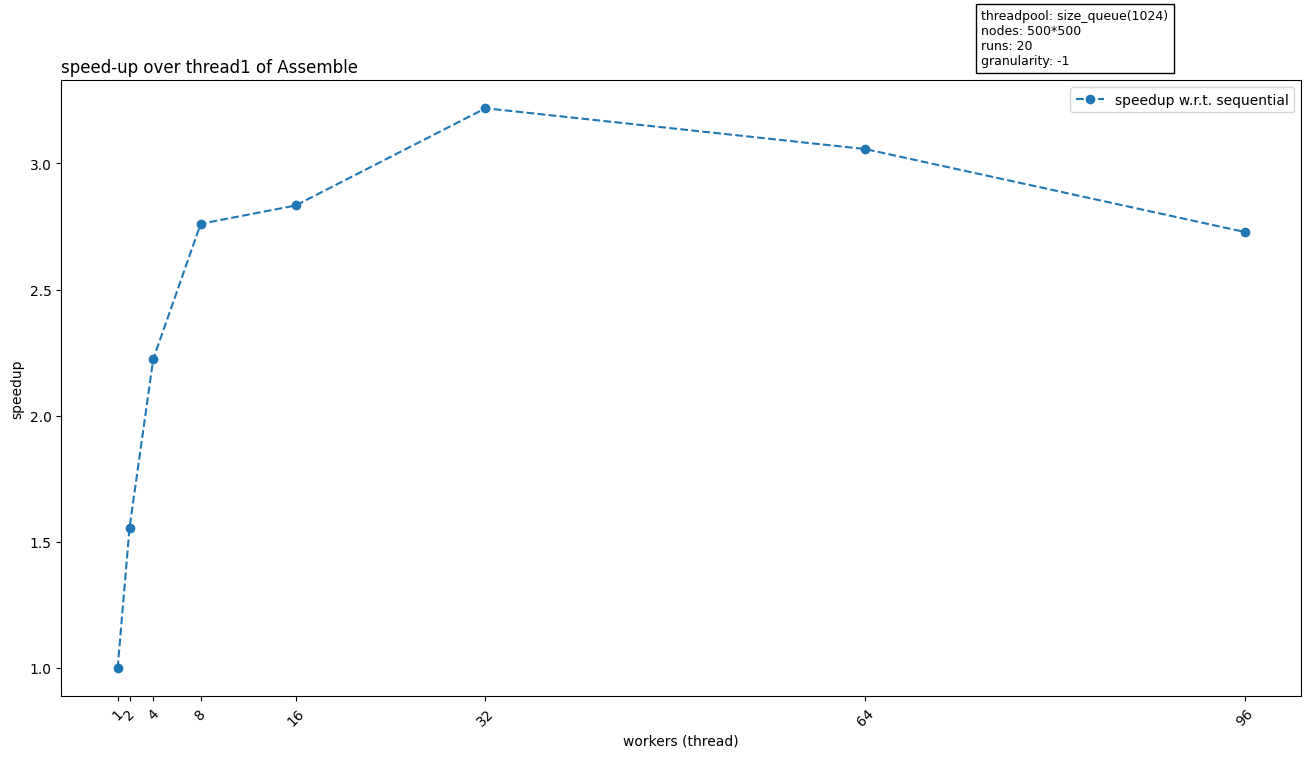

In [16]:
nodi = 500
plot_boxplot(assemble_nodi_500_seq, assemble_nodi_500_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_500_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_500_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)


=== Median values (µs) ===
for: 45446.00
1: 33640.00
2: 21374.00
4: 15931.50
8: 12094.50
16: 11334.50
32: 15269.00
64: 16735.00
96: 17226.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.57
4 threads -> speedup: 2.11
8 threads -> speedup: 2.78
16 threads -> speedup: 2.97
32 threads -> speedup: 2.20
64 threads -> speedup: 2.01
96 threads -> speedup: 1.95


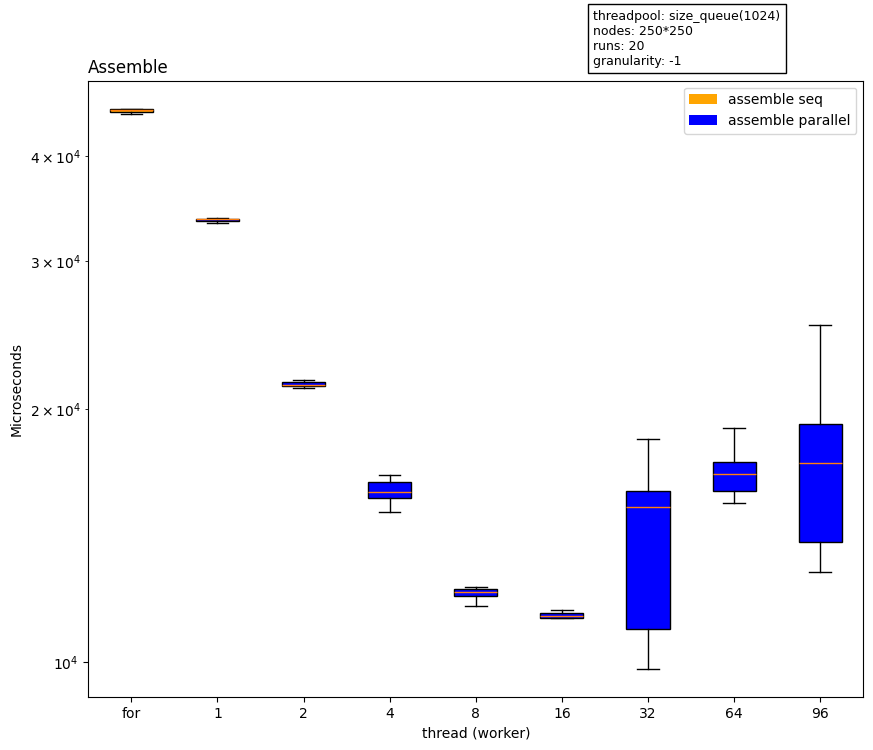

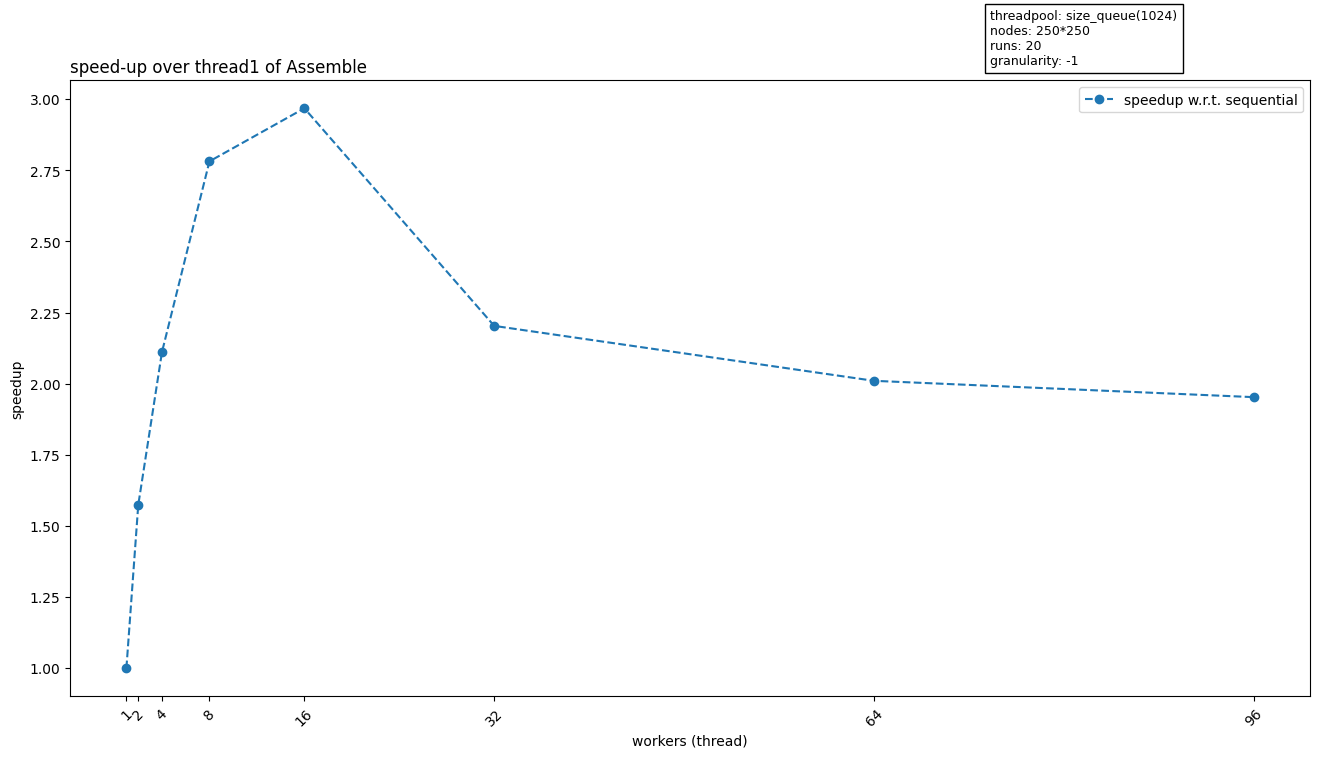

In [9]:
nodi = 250
plot_boxplot(assemble_nodi_250_seq, assemble_nodi_250_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_250_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_250_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)

## Calcolo triple 


In [58]:

def plot_speedup(data_list, title, n_threads):
    fig, ax = plt.subplots(figsize=[16, 8])

    # Mediane dei dati
    data_median = [np.median(datum) for datum in data_list]

    # Calcolo speedup
    speedup = np.array([data_median[1] / data_median[i+1] for i in range(len(n_threads))])

    # Linea speedup + marker
    ax.plot(n_threads, speedup, 'o--', color='blue', label='speedup')

    # Linea massimo speedup teorico (speedup = n_threads)
    ax.plot(n_threads, n_threads, 'r--', label='maximum')

    ax.set_title(title, loc='left')
    ax.set_xscale('log', base=2)  # log2 sull'asse x
    ax.set_xticks(n_threads)
    ax.set_xticklabels([str(n) for n in n_threads], rotation=45)
    ax.set_yscale('log', base=2)
    ax.set(xlabel='Workers (threads)', ylabel='Speedup')
    ax.legend()
    
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_list[0])}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print dei valori di speedup con thread ---
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")


In [59]:
# THREAD 1
calcolo_triple_nodi_250_thread_1 = [25943,25781,25210,25738,25390,25432,25240,25797,25362,25319,25263,25046,25280,25444,25042,25798,25356,25364,25368,25640]
calcolo_triple_nodi_500_thread_1 = [103808,103714,102660,101894,101628,102568,102447,102485,102915,102798,102234,102004,102190,101737,102047,101972,102889,102903,102363,102208]
calcolo_triple_nodi_1000_thread_1 = [408467,408720,407801,407718,411461,408634,409240,424287,407872,406743,406976,405882,406542,406357,406443,408741,410093,408637,408019,405957]

# THREAD SEQUENZIALE
calcolo_triple_nodi_250_thread_seq = [42680,38097,38082,38122,38164,38715,38600,38106,38283,38154,38203,38599,38603,38134,38125,38160,38202,38617,38644,38180]
calcolo_triple_nodi_500_thread_seq = [163347,159228,160282,160378,158869,160057,160330,158408,160381,159937,159186,160320,160730,158707,160377,160424,158983,160576,160633,159014]
calcolo_triple_nodi_1000_thread_seq = [638177,634690,644629,644219,644683,644059,638081,638718,644474,644810,644427,643812,637495,638501,641394,644561,644425,644917,635564,635174]

# THREAD 2
calcolo_triple_nodi_250_thread_2 = [13344,12735,12693,13011,13093,13019,13171,13028,13189,13095,13024,13220,13410,13123,13050,13120,13048,13120,12988,13220]
calcolo_triple_nodi_500_thread_2 = [54549,52318,51575,51587,53900,52401,51513,51915,52020,51928,52107,52814,52010,52761,52367,52509,52672,52289,52319,52233]
calcolo_triple_nodi_1000_thread_2 = [207722,205301,204727,206842,204979,206992,204909,206261,204890,208367,204540,207424,206108,205568,206280,206435,206115,207446,205398,206739]

# THREAD 4
calcolo_triple_nodi_250_thread_4 = [6833,6499,7060,6982,6457,6406,7008,6760,6607,6623,6753,6651,6714,7104,7706,6848,7919,6665,6497,6903]
calcolo_triple_nodi_500_thread_4 = [26278,26555,27053,26530,26781,27053,26907,36399,26645,26207,27444,27996,26863,28056,26327,26843,26614,26557,26630,30960]
calcolo_triple_nodi_1000_thread_4 = [103949,114729,106420,106329,107456,103972,106917,104488,106573,106054,103997,104276,103954,121769,103517,106119,121531,105324,106740,106965]

# THREAD 8
calcolo_triple_nodi_250_thread_8 = [4112,3693,3424,3410,3448,3541,3471,3352,3389,3369,3676,3627,3456,4069,3507,3433,3496,3973,3314,3553]
calcolo_triple_nodi_500_thread_8 = [13670,13724,14086,13752,13595,13304,14466,14041,13723,13430,13775,13666,14974,13279,13454,13999,13713,13620,13684,14025]
calcolo_triple_nodi_1000_thread_8 = [55637,54842,53520,56743,53435,56979,55604,53174,53058,52247,53324,52166,52796,54151,55766,53347,53663,53530,53807,57053]

# THREAD 16
calcolo_triple_nodi_250_thread_16 = [2083,3393,3200,3195,3175,3216,3193,3234,1914,3181,2137,3189,3205,3166,3174,3392,3163,3165,1938,3386]
calcolo_triple_nodi_500_thread_16 = [7590,7075,7486,12763,6997,12979,12821,6979,12915,12773,13138,6954,7147,7404,7740,12718,13592,7198,7182,7207]
calcolo_triple_nodi_1000_thread_16 = [26836,28002,28280,27200,44040,28631,27631,27081,28135,29298,26939,51243,51180,28712,27458,29020,28055,26708,27119,26957]

# THREAD 32
calcolo_triple_nodi_250_thread_32 = [2059,2420,1891,1868,2041,2437,3068,1825,3707,5261,2239,3327,3647,1852,3032,3169,3846,1901,5962,1993]
calcolo_triple_nodi_500_thread_32 = [7265,6904,7265,7129,6949,7147,6774,6907,8580,6804,6959,6851,7794,6823,9277,7029,7052,6838,7027,7428]
#calcolo_triple_nodi_1000_thread_32 = [26360,38261,26641,26600,34762,34202,27338,35809,38566,26833,35955,35904,26413,38695,36438,38427,37704,36738,26218,27019]
calcolo_triple_nodi_1000_thread_32 = [22586 ,22581 ,30067 ,22644 ,25269 ,30916 ,24876 ,24574 ,25246 ,26752 ,25018 ,36389 ,22710 ,28593 ,29984 ,31860 ,24279 ,22891 ,29787 ,24590] #preso da test_cluser_2

# THREAD 64
calcolo_triple_nodi_250_thread_64 = [3667,3902,4927,3592,3500,3235,3350,3756,3272,1796,3079,3762,2663,2946,3669,3137,3765,2376,2361,2809]
calcolo_triple_nodi_500_thread_64 = [6875,10954,7838,6330,8969,7320,7821,11017,7001,8261,8379,7987,12256,12352,8763,7256,6441,7216,11877,7441]
calcolo_triple_nodi_1000_thread_64 = [26527,23377,27393,30424,25110,29867,25072,26185,33260,30999,18701,23901,26421,25198,28807,25808,26518,31112,29953,28684]

# THREAD 96
calcolo_triple_nodi_250_thread_96 = [4825,6061,5815,4132,2868,3134,3843,5814,4000,5172,5671,4403,3171,4754,3760,4070,5359,3495,4172,4039]
calcolo_triple_nodi_500_thread_96 = [20114,9850,9226,11257,9800,13277,10080,13992,10601,14964,6243,9389,11151,10077,10047,11908,14102,10177,12447,8514]
calcolo_triple_nodi_1000_thread_96 = [34276,30010,32150,29081,32453,28075,35504,29541,28525,20410,29454,32124,29905,27597,27434,33096,27027,23637,29620,31932]


In [60]:
# NODI 250
calcolo_triple_nodi_250_multi = [
    calcolo_triple_nodi_250_thread_1,
    calcolo_triple_nodi_250_thread_2,
    calcolo_triple_nodi_250_thread_4,
    calcolo_triple_nodi_250_thread_8,
    calcolo_triple_nodi_250_thread_16,
    calcolo_triple_nodi_250_thread_32,
    calcolo_triple_nodi_250_thread_64,
    calcolo_triple_nodi_250_thread_96
]

# NODI 500
calcolo_triple_nodi_500_multi = [
    calcolo_triple_nodi_500_thread_1,
    calcolo_triple_nodi_500_thread_2,
    calcolo_triple_nodi_500_thread_4,
    calcolo_triple_nodi_500_thread_8,
    calcolo_triple_nodi_500_thread_16,
    calcolo_triple_nodi_500_thread_32,
    calcolo_triple_nodi_500_thread_64,
    calcolo_triple_nodi_500_thread_96
]

# NODI 1000
calcolo_triple_nodi_1000_multi = [
    calcolo_triple_nodi_1000_thread_1,
    calcolo_triple_nodi_1000_thread_2,
    calcolo_triple_nodi_1000_thread_4,
    calcolo_triple_nodi_1000_thread_8,
    calcolo_triple_nodi_1000_thread_16,
    calcolo_triple_nodi_1000_thread_32,
    calcolo_triple_nodi_1000_thread_64,
    calcolo_triple_nodi_1000_thread_96
]



=== Median values (µs) ===
seq: 643935.50
1: 407945.50
2: 206188.00
4: 106224.00
8: 53596.50
16: 28028.50
32: 25132.00
64: 26522.50
96: 29580.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.98
4 threads -> speedup: 3.84
8 threads -> speedup: 7.61
16 threads -> speedup: 14.55
32 threads -> speedup: 16.23
64 threads -> speedup: 15.38
96 threads -> speedup: 13.79


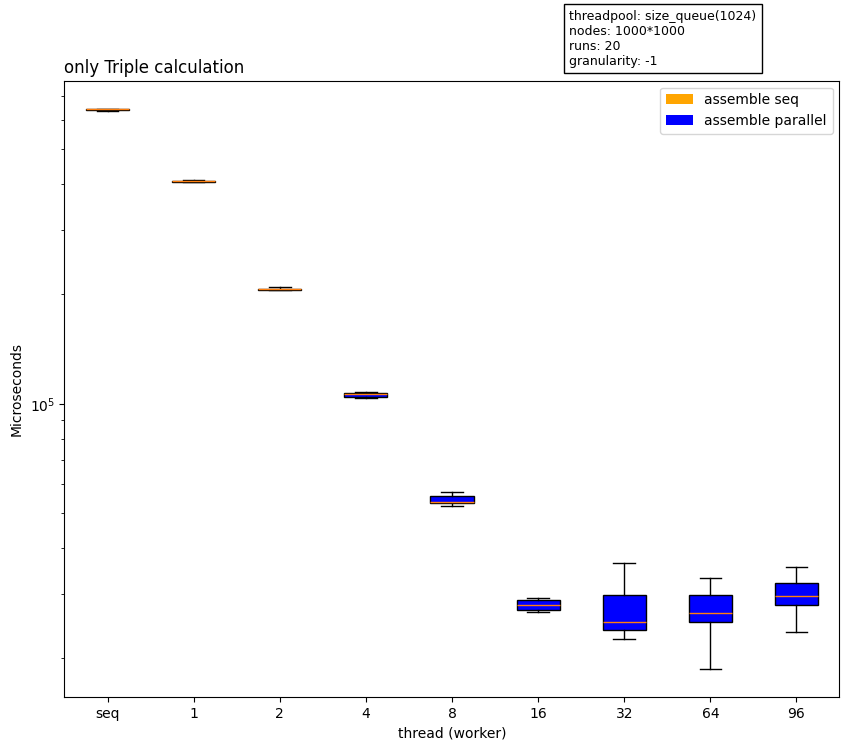

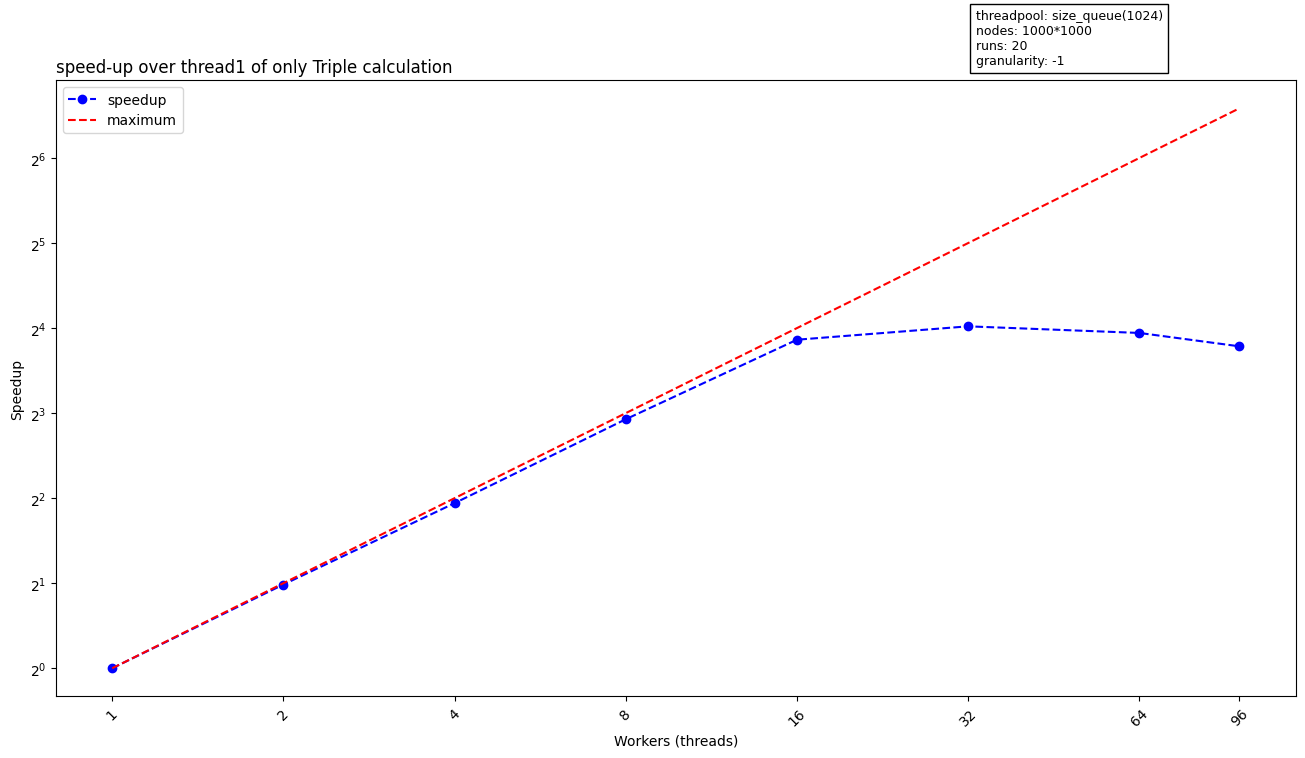

In [61]:
nodi = 1000 #500 250
plot_boxplot(calcolo_triple_nodi_1000_thread_seq, calcolo_triple_nodi_1000_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_nodi_1000_thread_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_1000_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)


=== Median values (µs) ===
for: 160301.00
1: 102405.00
2: 52303.50
4: 26812.00
8: 13718.00
16: 7538.00
32: 7028.00
64: 7912.50
96: 10389.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.96
4 threads -> speedup: 3.82
8 threads -> speedup: 7.47
16 threads -> speedup: 13.59
32 threads -> speedup: 14.57
64 threads -> speedup: 12.94
96 threads -> speedup: 9.86


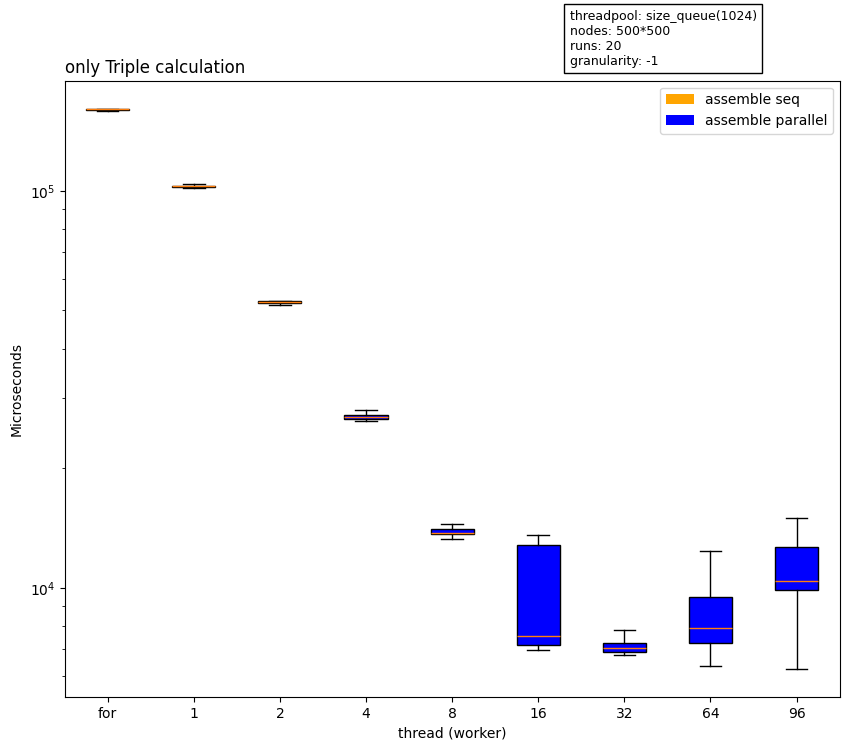

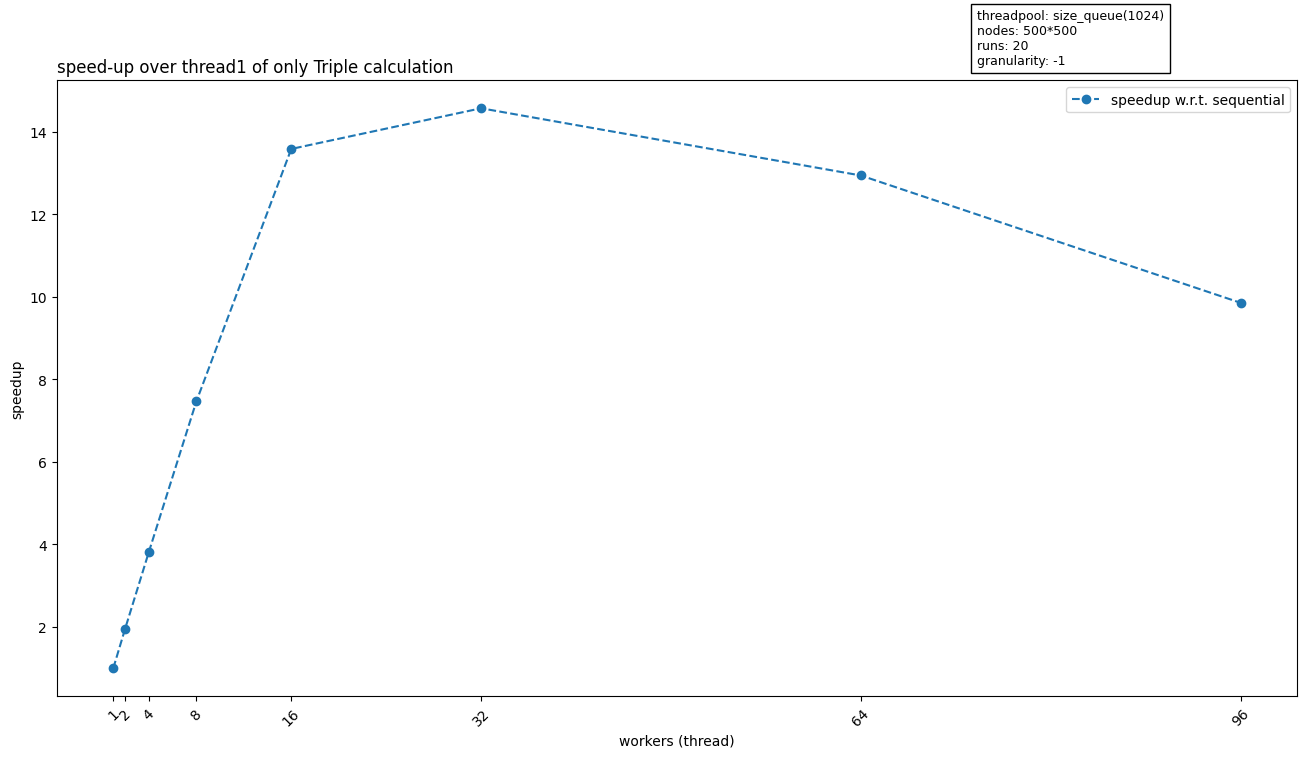

In [17]:
nodi = 500 
plot_boxplot(calcolo_triple_nodi_500_thread_seq, calcolo_triple_nodi_500_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_nodi_500_thread_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_500_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)


=== Median values (µs) ===
for: 38191.00
1: 25366.00
2: 13094.00
4: 6756.50
8: 3483.50
16: 3185.00
32: 2428.50
64: 3311.00
96: 4152.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.94
4 threads -> speedup: 3.75
8 threads -> speedup: 7.28
16 threads -> speedup: 7.96
32 threads -> speedup: 10.45
64 threads -> speedup: 7.66
96 threads -> speedup: 6.11


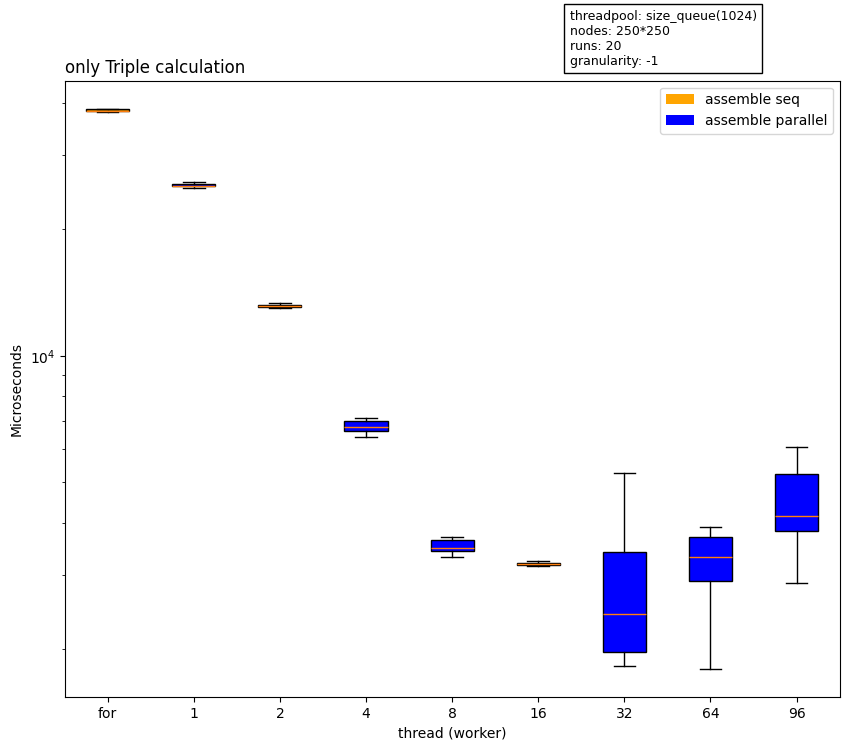

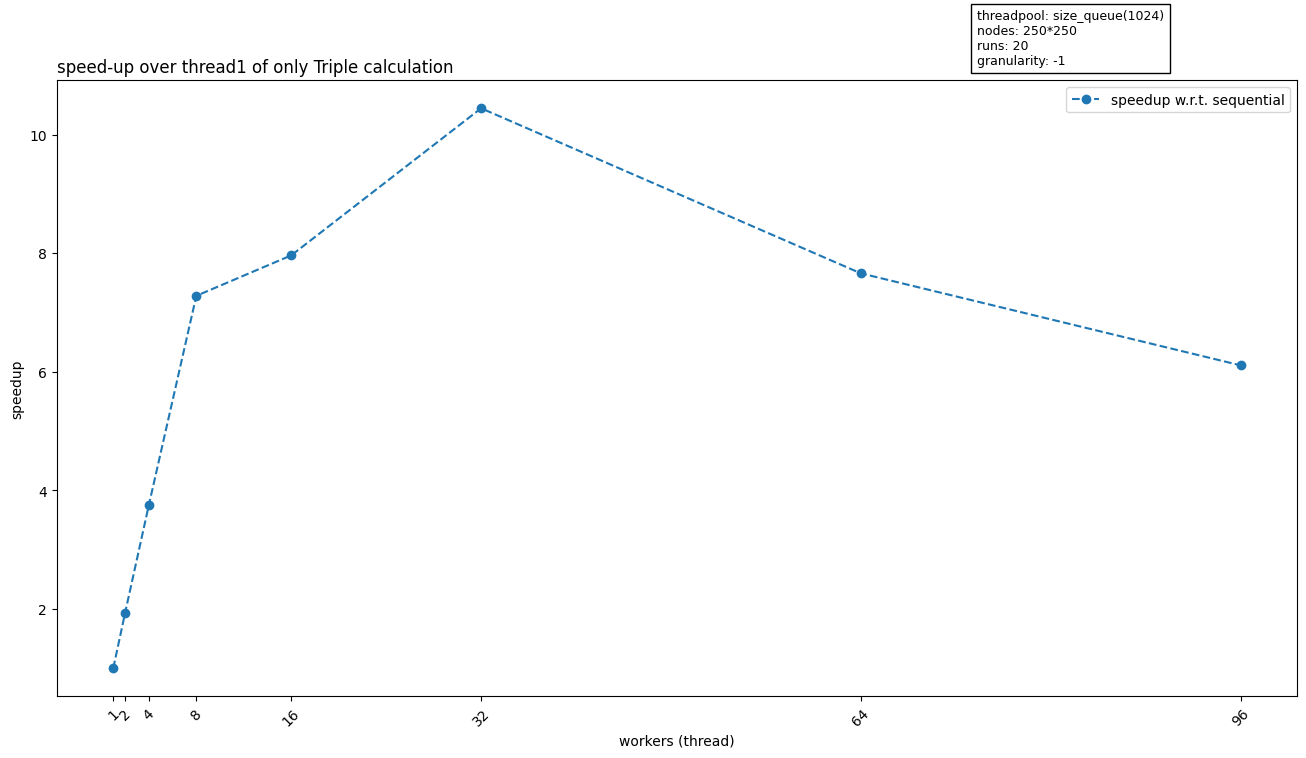

In [15]:
nodi = 250
plot_boxplot(calcolo_triple_nodi_250_thread_seq, calcolo_triple_nodi_250_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_nodi_250_thread_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_250_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)

## adamal low

In [34]:
# Mediane per nodi 250
median_calcolo_250_seq = np.median(calcolo_triple_nodi_250_thread_seq)
median_calcolo_250_th1 = np.median(calcolo_triple_nodi_250_thread_1)
median_calcolo_250_th2 = np.median(calcolo_triple_nodi_250_thread_2)
median_calcolo_250_th4 = np.median(calcolo_triple_nodi_250_thread_4)
median_calcolo_250_th8 = np.median(calcolo_triple_nodi_250_thread_8)
median_calcolo_250_th16 = np.median(calcolo_triple_nodi_250_thread_16)

# Mediane per nodi 500
median_calcolo_500_seq = np.median(calcolo_triple_nodi_500_thread_seq)
median_calcolo_500_th1 = np.median(calcolo_triple_nodi_500_thread_1)
median_calcolo_500_th2 = np.median(calcolo_triple_nodi_500_thread_2)
median_calcolo_500_th4 = np.median(calcolo_triple_nodi_500_thread_4)
median_calcolo_500_th8 = np.median(calcolo_triple_nodi_500_thread_8)
median_calcolo_500_th16 = np.median(calcolo_triple_nodi_500_thread_16)

# Mediane per nodi 1000
median_calcolo_1000_seq = np.median(calcolo_triple_nodi_1000_thread_seq)
median_calcolo_1000_th1 = np.median(calcolo_triple_nodi_1000_thread_1)
median_calcolo_1000_th2 = np.median(calcolo_triple_nodi_1000_thread_2)
median_calcolo_1000_th4 = np.median(calcolo_triple_nodi_1000_thread_4)
median_calcolo_1000_th8 = np.median(calcolo_triple_nodi_1000_thread_8)
median_calcolo_1000_th16 = np.median(calcolo_triple_nodi_1000_thread_16)


# Mediane per nodi 250
median_assemble_250_seq = np.median(assemble_nodi_250_seq)
median_assemble_250_th1 = np.median(assemble_nodi_250_thread_1)
median_assemble_250_th2 = np.median(assemble_nodi_250_thread_2)
median_assemble_250_th4 = np.median(assemble_nodi_250_thread_4)
median_assemble_250_th8 = np.median(assemble_nodi_250_thread_8)
median_assemble_250_th16 = np.median(assemble_nodi_250_thread_16)

# Mediane per nodi 500
median_assemble_500_seq = np.median(assemble_nodi_500_seq)
median_assemble_500_th1 = np.median(assemble_nodi_500_thread_1)
median_assemble_500_th2 = np.median(assemble_nodi_500_thread_2)
median_assemble_500_th4 = np.median(assemble_nodi_500_thread_4)
median_assemble_500_th8 = np.median(assemble_nodi_500_thread_8)
median_assemble_500_th16 = np.median(assemble_nodi_500_thread_16)

# Mediane per nodi 1000
median_assemble_1000_seq = np.median(assemble_nodi_1000_seq)
median_assemble_1000_th1 = np.median(assemble_nodi_1000_thread_1)
median_assemble_1000_th2 = np.median(assemble_nodi_1000_thread_2)
median_assemble_1000_th4 = np.median(assemble_nodi_1000_thread_4)
median_assemble_1000_th8 = np.median(assemble_nodi_1000_thread_8)
median_assemble_1000_th16 = np.median(assemble_nodi_1000_thread_16)




In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Median values for Assemble
assemble_seq = [median_assemble_250_seq, median_assemble_500_seq, median_assemble_1000_seq]
assemble_th1 = [median_assemble_250_th1, median_assemble_500_th1, median_assemble_1000_th1]
assemble_th2 = [median_assemble_250_th2, median_assemble_500_th2, median_assemble_1000_th2]
assemble_th4 = [median_assemble_250_th4, median_assemble_500_th4, median_assemble_1000_th4]
assemble_th8 = [median_assemble_250_th8, median_assemble_500_th8, median_assemble_1000_th8]
assemble_th16 = [median_assemble_250_th16, median_assemble_500_th16, median_assemble_1000_th16]

# Median values for Calcolo
calcolo_seq = [median_calcolo_250_seq, median_calcolo_500_seq, median_calcolo_1000_seq]
calcolo_th1 = [median_calcolo_250_th1, median_calcolo_500_th1, median_calcolo_1000_th1]
calcolo_th2 = [median_calcolo_250_th2, median_calcolo_500_th2, median_calcolo_1000_th2]
calcolo_th4 = [median_calcolo_250_th4, median_calcolo_500_th4, median_calcolo_1000_th4]
calcolo_th8 = [median_calcolo_250_th8, median_calcolo_500_th8, median_calcolo_1000_th8]
calcolo_th16 = [median_calcolo_250_th16, median_calcolo_500_th16, median_calcolo_1000_th16]



In [ ]:
n = [1,2,4,8,16,32,64,96]
speedup_max = []
for i in n:
    p = calcolo_th1[2]/assemble_th1[2]
    s = 1-p 
    speedup_max.append(1/(s+p/i))
print(speedup_max)
print(calcolo_th1[2]/assemble_th1[2]) #p/(s+p) in nodi 1000 

[np.float64(1.0), np.float64(1.5592481220530163), np.float64(2.164492229258636), np.float64(2.6857475970017313), np.float64(3.053410400201744), np.float64(3.27776352384384), np.float64(3.4027750879599643), np.float64(3.4465919411588)]
0.7173305058295286


In [53]:
def plot_speedup_max(data_list, title, n_threads, speedup_max, size_queue, nodi, kk):
    """
    data_list: primo elemento è sequenziale, gli altri paralleli
    n_threads: lista di thread corrispondenti ai dati paralleli
    speedup_max: vettore dei valori di massimo speedup da mostrare in rosso
    """
    fig, ax = plt.subplots(figsize=[16, 8])

    # Mediane dei dati
    data_median = [np.median(datum) for datum in data_list]

    # Calcolo speedup rispetto al secondo elemento (o al primo sequenziale se preferisci)
    speedup = np.array([data_median[1] / data_median[i+1] for i in range(len(n_threads))])

    # Plot speedup misurato
    ax.plot(n_threads, speedup, 'o--', color='blue', label='speedup w.r.t thread-sequential')

    # Plot speedup massimo
    ax.plot(n_threads, speedup_max, 's--', color='red', label='Amdahl maximum speedup')

    ax.set_xscale('log', base=2)  # log2 sull'asse x
    ax.set_xticks(n_threads)
    ax.set_xticklabels([str(n) for n in n_threads], rotation=45)

    ax.set(xlabel='Workers (threads)', ylabel='Speedup')
    ax.legend()
    
    plt.title(title, loc='left')

    plt.figtext(0.7, 0.9, 
                f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_list[0])}\ngranularity: {kk}", 
                fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
    
    # Print dei valori di speedup con thread
    print("\n=== Speedup values ===")
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")
    print("\n=== Maximum speedup ===")
    for n, s in zip(n_threads, speedup_max):
        print(f"{n} threads -> max speedup: {s:.2f}")



=== Speedup values ===
1 threads -> speedup: 1.00
2 threads -> speedup: 1.53
4 threads -> speedup: 2.11
8 threads -> speedup: 2.65
16 threads -> speedup: 3.00
32 threads -> speedup: 2.96
64 threads -> speedup: 2.97
96 threads -> speedup: 2.90

=== Maximum speedup ===
1 threads -> max speedup: 1.00
2 threads -> max speedup: 1.56
4 threads -> max speedup: 2.16
8 threads -> max speedup: 2.69
16 threads -> max speedup: 3.05
32 threads -> max speedup: 3.28
64 threads -> max speedup: 3.40
96 threads -> max speedup: 3.45


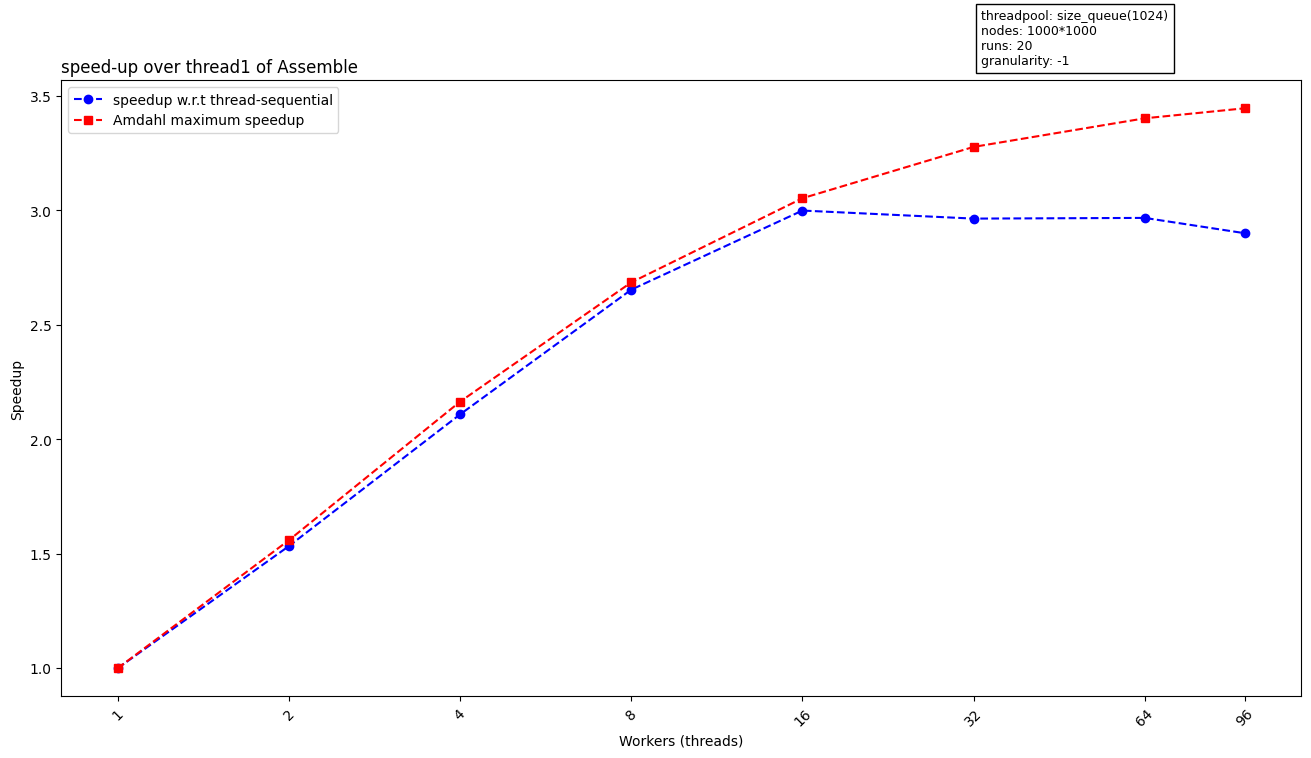

In [62]:
nodi = 1000 #500 250
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_1000_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_1000_multi[i]))
plot_speedup_max(data_list,"speed-up over thread1 of Assemble",n_threads,speedup_max,1024,1000,-1)

In [ ]:
calcolo_th1[2]/assemble_th1[2] # p/s+p in nodi 1000

np.float64(0.7173305058295286)

## scalabilità debole


risultati pessimi, perché job pesanti e thread si disturbano durante ricerca valori credo

In [86]:
def plot_boxplot_weak(data, title, n_threads, nodes, size_queue, granularity):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = data
    ticks = [f"{n},{s}" for n, s in zip(n_threads, nodes)]

    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel='n_thread, sqrt(nodes)', ylabel='Microseconds')
    ax.set_title(title, loc='left')
    ax.set_xticks(range(1, len(boxs) + 1))
    ax.set_xticklabels(ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['blue'] * len(bplot['boxes'])
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [Patch(facecolor='blue', label='grid search parallel')]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, 
                f"threadpool: size_queue({size_queue})\nruns: {len(data[0])}\ngranularity: {granularity}", 
                fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

    # Print delle mediane dei boxplot
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [87]:

def plot_efficiency(data, title, n_threads, nodes, size_queue, granularity):
    
    # Calcolo efficienza mediana / sequenziale
    seq_median = np.median(data[0])
    efficiencies = [seq_median / np.median(d) for d in data]
    
    # Prepara ticks
    ticks = [f"{n},{s}" for n, s in zip(n_threads, nodes)]
    
    fig, ax = plt.subplots(figsize=[10, 8])
    
    x = range(len(efficiencies))
    
    # Linea + pallini
    ax.plot(x, efficiencies, color='blue', marker='o', linestyle='-', markersize=8)
    
    ax.set(xlabel='n_thread, sqrt(nodes)', ylabel='Efficiency')
    ax.set_title(title, loc='left')
    ax.set_xticks(x)
    ax.set_xticklabels(ticks)
    
    plt.figtext(0.63, 0.9, 
                f"threadpool: size_queue({size_queue})\nruns: {len(data[0])}\ngranularity: {granularity}", 
                fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
    
    # Print delle efficienze mediane
    print("\n=== Median efficiencies ===")
    for label, eff in zip(ticks, efficiencies):
        print(f"{label}: {eff:.2f}")
    print("===========================\n")


=== Median values (µs) ===
1,250: 25366.00
4,500: 26812.00
16,1000: 28028.50


=== Median efficiencies ===
1,250: 1.00
4,500: 0.95
16,1000: 0.91



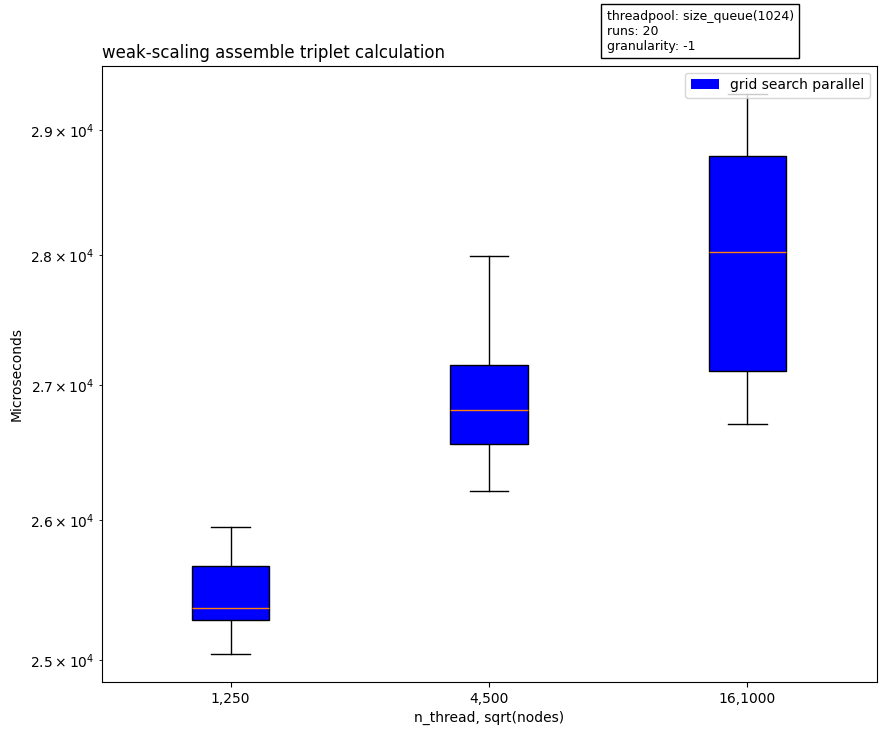

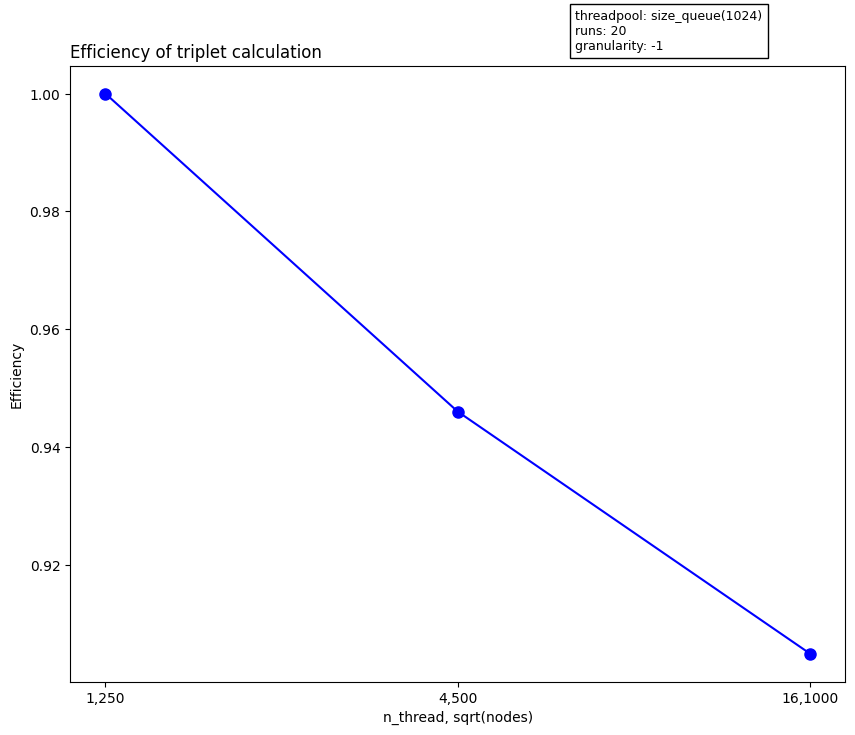

In [89]:
nodes = [250, 500, 1000]
dati = []
dati.append(calcolo_triple_nodi_250_thread_1)
dati.append(calcolo_triple_nodi_500_thread_4)
dati.append(calcolo_triple_nodi_1000_thread_16)
plot_boxplot_weak(dati,"weak-scaling assemble triplet calculation", [1,4,16], nodes,1024,-1)
plot_efficiency(dati,"Efficiency of triplet calculation", [1,4,16], nodes,1024,-1)

## Effetto di granularity

In [56]:
def plot_granularity(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("for")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(granularity[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'iterazioni per job',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='for'),
        Patch(facecolor='blue', label='parallel_for')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nnodes : {nodi}x{nodi}\nruns: {len(data_par_for_n[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [63]:
def plot_speedup_granularity(data_list,title,gran): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list]
    speedup = np.zeros(len(gran))


    for i in range(len(gran)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    #print(data_list)
    #print(data_mean)
    gran = gran[::-1]
    speedup = speedup[::-1]
    ax.plot(gran,speedup,'o--')

    ax.legend(['speedup'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(gran)
    ax.set_xticklabels(gran, rotation = 45)


    ax.set(xlabel = 'graularity'+str(gran),ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nnodes: {nodi}x{nodi}\nruns:{len(data_list[1])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa degli speedup ---
    print("\n=== Speedup values ===")
    for g, s in zip(gran, speedup):
        print(f"Granularity {g}: speedup = {s:.2f}")
    print("=====================\n")

In [ ]:
#parametri
nodi = 500 # tot_celle = (nodi-1)^2, granularity di partenza quindi tot_celle/n_thread
n_thread = 16
size_queue = 1024 #hardcome in codice ma qui non conta
granularity = [62250,6000,600,60] # granularity

In [72]:
dati_seq = []
dati_seq =np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+".txt",delimiter=',',dtype=int)[:-1]
dati_par = []
for i,nb in enumerate(granularity):
    dati_par.append(np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+"_thread"+str(n_thread)+"_granularity"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== Median values (µs) ===
for: 94632.00
62250: 53660.00
6000: 52081.00
600: 55985.00
60: 589855.00



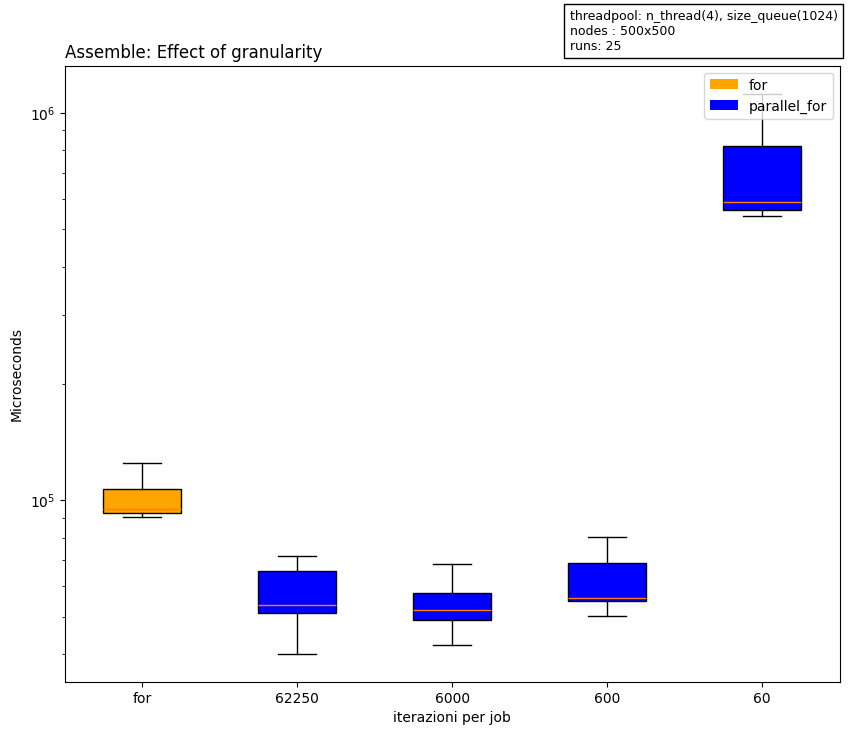

In [73]:
plot_granularity(dati_seq,dati_par,"Assemble: Effect of granularity")


=== Speedup values ===
Granularity 60: speedup = 0.16
Granularity 600: speedup = 1.69
Granularity 6000: speedup = 1.82
Granularity 62250: speedup = 1.76



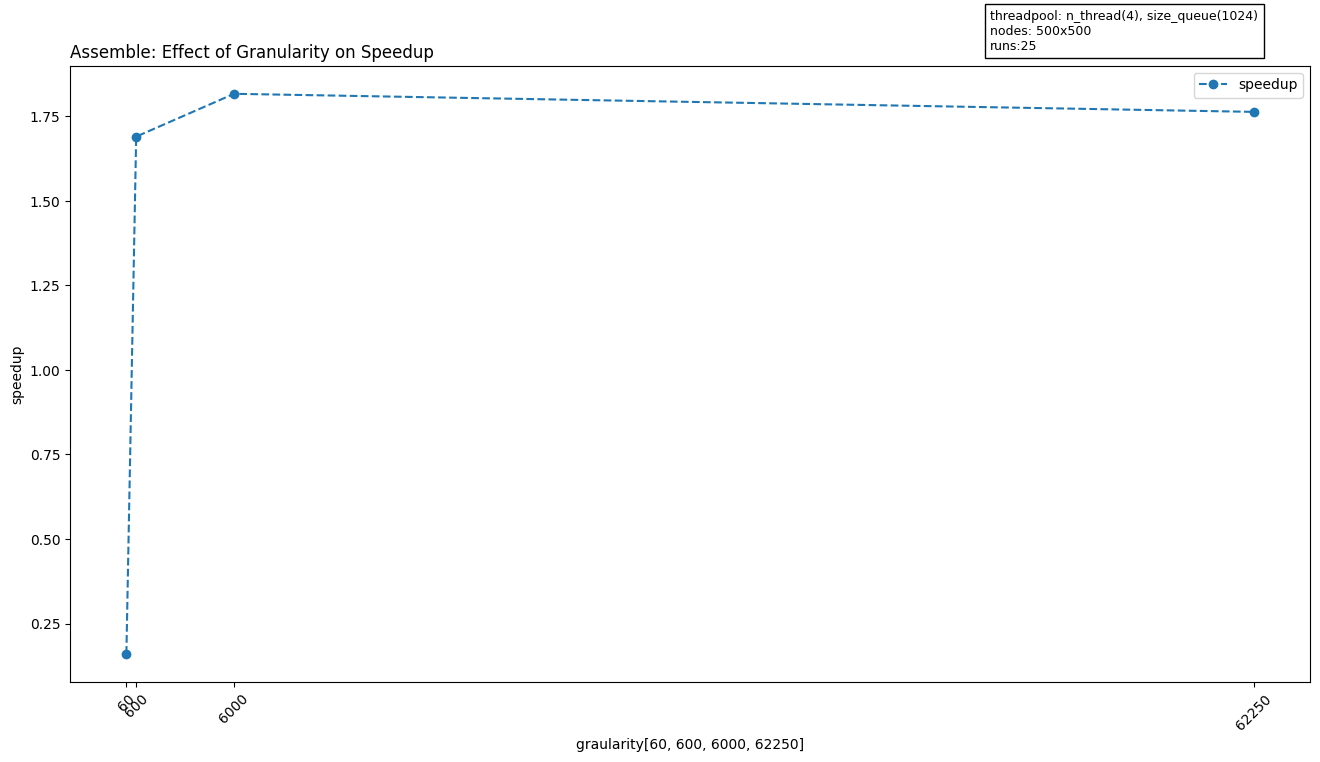

In [74]:
data_list = []
data_list.append(dati_seq)
for i,n in enumerate(granularity):
    data_list.append(dati_par[i])
plot_speedup_granularity(data_list,"Assemble: Effect of Granularity on Speedup",granularity)